In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # seaborn package for visualising
import plotly.express as px # plotly visualisation
import time
import matplotlib.pyplot as plt
from fastai.tabular import * 
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-coronavirus/2019_nCoV_data.csv
/kaggle/input/covid19-coronavirus/time_series_19-covid-Deaths.csv
/kaggle/input/covid19-coronavirus/time_series_19-covid-Confirmed.csv
/kaggle/input/covid19-coronavirus/time_series_19-covid-Recovered.csv


In [2]:
path = ('/kaggle/input/covid19-coronavirus/2019_nCoV_data.csv')
path

'/kaggle/input/covid19-coronavirus/2019_nCoV_data.csv'

In [3]:
whole_data_path='/kaggle/input/covid19-coronavirus/2019_nCoV_data.csv'

updated_corona_data = pd.read_csv("../input/covid19-coronavirus/2019_nCoV_data.csv")
time_series_19_covid_Confirmed = pd.read_csv("../input/covid19-coronavirus/time_series_19-covid-Confirmed.csv")
time_series_19_covid_Deaths = pd.read_csv("../input/covid19-coronavirus/time_series_19-covid-Deaths.csv")
time_series_19_covid_Recovered = pd.read_csv("../input/covid19-coronavirus/time_series_19-covid-Recovered.csv")

#recovered_data_path='/kaggle/input/covid19-coronavirus/time_series_19-covid-Recovered.csv'
#deaths_data_path='/kaggle/input/covid19-coronavirus/time_series_19-covid-Deaths.csv'
#confirmed_data_path='/kaggle/input/covid19-coronavirus/time_series_19-covid-Confirmed.csv'

corona_data= pd.read_csv(whole_data_path)
#recovered_data=pd.read_csv(recovered_data_path)
#deaths_data=pd.read_csv(recovered_data_path)
#confirmed_data=pd.read_csv(recovered_data_path)

In [4]:
corona_data.shape
#Total no. of rows|

(2484, 8)

In [5]:
corona_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 8 columns):
Sno               2484 non-null int64
Date              2484 non-null object
Province/State    1781 non-null object
Country           2484 non-null object
Last Update       2484 non-null object
Confirmed         2484 non-null int64
Deaths            2484 non-null int64
Recovered         2484 non-null int64
dtypes: int64(4), object(4)
memory usage: 155.4+ KB


In [6]:
if 'Last Update' in corona_data.columns :
    corona_data=corona_data.drop('Last Update',axis=1)
elif  'Sno' in corona_data.columns:
    corona_data=corona_data.drop('Sno',axis=1)
    
#corona_data["Date"] = corona_data['Date'].astype('datetime64')
corona_data["Date"] = corona_data['Date'].astype('datetime64')

corona_data["Confirmed"] = corona_data['Confirmed'].astype('int64')
corona_data["Deaths"] = corona_data['Deaths'].astype('int64')
corona_data["Recovered"] = corona_data['Recovered'].astype('int64')

print('Minimum date collected - ',min(corona_data["Date"]))
print('Maximum date collected - ',max(corona_data["Date"]))

corona_data=corona_data.rename(columns={"Date": "Date","Country/Region":"Country"})

Minimum date collected -  2020-01-22 12:00:00
Maximum date collected -  2020-02-26 22:00:00


In [7]:
print('Total no. of confirmed cases over these days',sum(corona_data['Confirmed']))
print('Total no. of deaths over these days',sum(corona_data['Deaths']))
print('Total no. of recovered cases over these days',sum(corona_data['Recovered']))

Total no. of confirmed cases over these days 1484239
Total no. of deaths over these days 39610
Total no. of recovered cases over these days 273594


In [8]:
corona_data_date=pd.DataFrame(corona_data.groupby(by='Date').sum())
if 'Sno' in corona_data_date.columns:
    corona_data_date=corona_data_date.drop('Sno',axis=1)
corona_data_date['Date']=corona_data_date.index
corona_data_date.Date=corona_data_date.Date.apply(lambda x:x.date())

In [9]:
melted_data=pd.melt(corona_data_date,id_vars=['Date'])

In [10]:
def bar_plot(column_name):
    plt.figure(figsize=(10,15))
    plt.xticks(rotation=90)
    plt.xlabel('Date', fontsize=18)
    plot_1=sns.barplot(x='Date',y=column_name,data=corona_data_date)
    plot_1

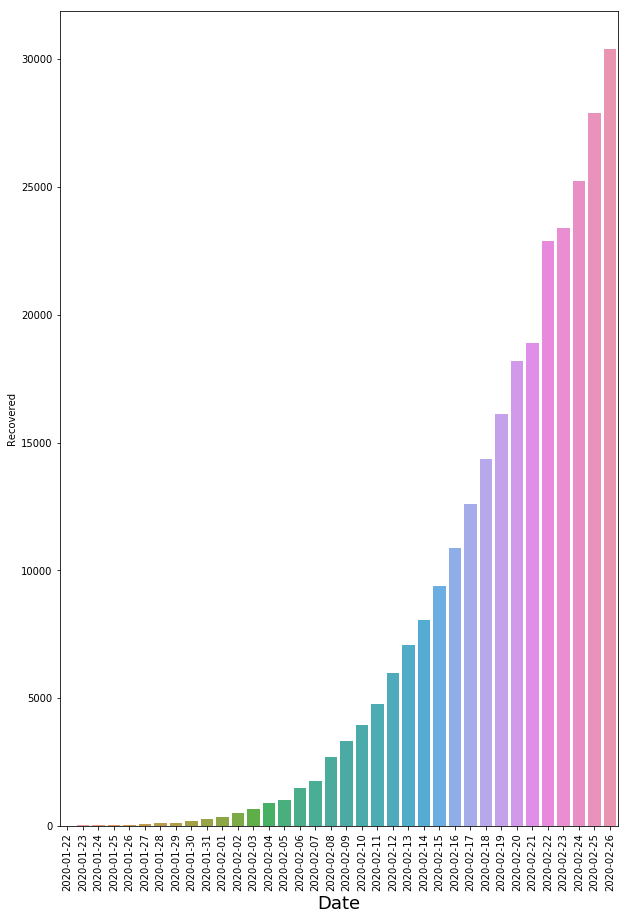

In [11]:
bar_plot('Recovered')

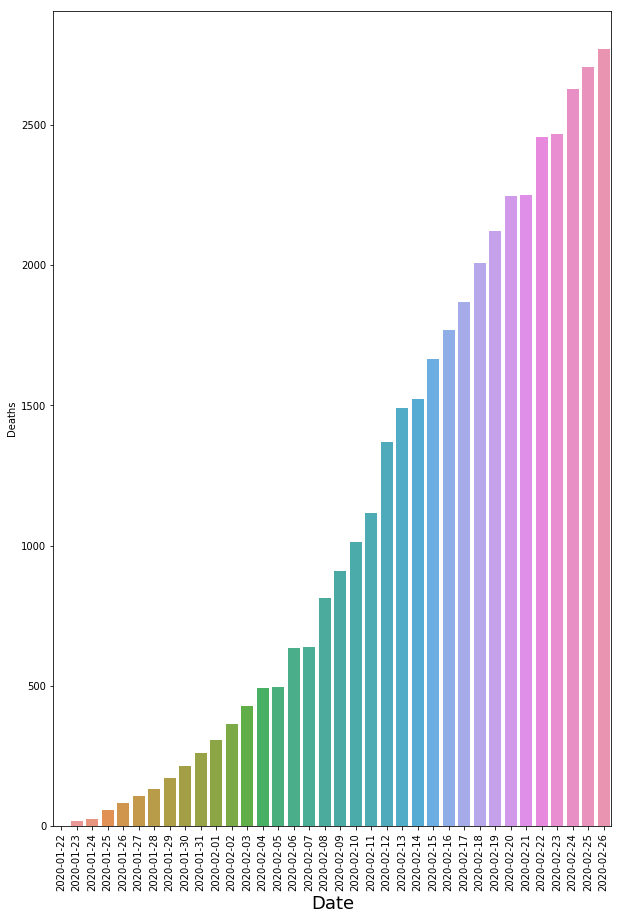

In [12]:
bar_plot('Deaths')

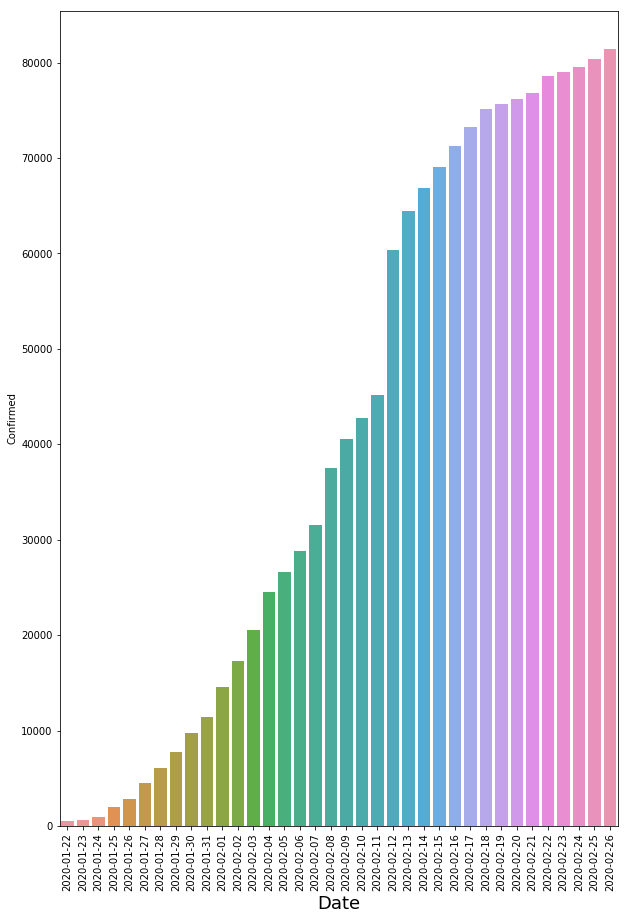

In [13]:
bar_plot('Confirmed')

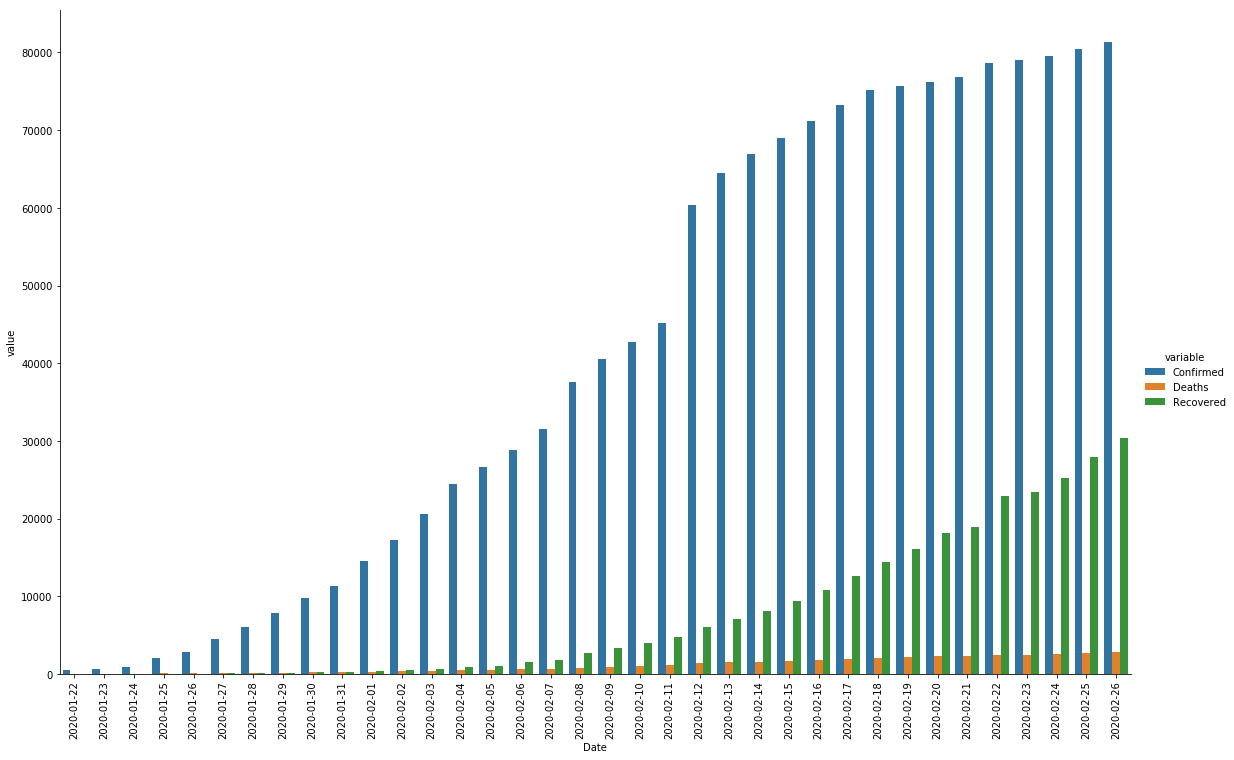

In [14]:
hm=sns.catplot(x='Date', y='value', hue='variable', data=melted_data, kind='bar',height=10,aspect =1.6,legend=True)
hm.set_xticklabels( rotation=90)

In [15]:
import plotly.express as px
fig = px.line(melted_data, x="Date",y='value', color='variable')
fig.show()

In [16]:
corona_data_country=pd.DataFrame(corona_data.groupby(by='Country').sum())
if 'Sno' in corona_data_country:
    corona_data_country=corona_data_country.drop('Sno',axis=1)
corona_data_country['country']=corona_data_country.index

In [17]:
corona_data_country.sort_values(['Confirmed','Deaths','Recovered'],ascending=[False,False,False])

,Confirmed,Deaths,Recovered,country
Country,,,,
Mainland China,1458844,39351,270836,Mainland China
Others,8004,19,14,Others
South Korea,4920,41,215,South Korea
Japan,1735,15,272,Japan
Singapore,1578,0,510,Singapore
Hong Kong,1339,31,105,Hong Kong
Italy,1299,35,8,Italy
Thailand,903,0,341,Thailand
US,565,0,68,US


In [18]:
corona_data_country["country"].replace({"Ivory Coast": "Cote d'Ivoire", 
                                        "Mainland China": "China",
                                        "Hong Kong":"Hong Kong, China",
                                       "South Korea":"Korea, Rep.",
                                        "UK":"United Kingdom",
                                        "US":"United States",
                                        "Macau" :"China"
                                       }, inplace=True)

In [19]:
df = px.data.gapminder().query("year == 2007")
corona_data_country_geo_cd=pd.merge(corona_data_country,df,how='left',on='country')

In [20]:
#Removing NaN based rows 
corona_data_country_geo_cd=corona_data_country_geo_cd.dropna(how='any')
corona_data_country_geo_cd=corona_data_country_geo_cd.drop(['year','lifeExp','pop','gdpPercap'],axis=1)

In [21]:
fig = px.scatter_geo(corona_data_country_geo_cd[corona_data_country_geo_cd['country']!='China'], locations="iso_alpha",
                     size="Confirmed", # size of markers, "pop" is one of the columns of gapminder)
                    )
fig.show()

In [22]:
fig = px.choropleth(corona_data_country_geo_cd[corona_data_country_geo_cd['country']!='China'], locations="iso_alpha",
                    color="Confirmed", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Electric)
fig.show()

In [23]:
fig = px.choropleth(corona_data_country_geo_cd[corona_data_country_geo_cd['country']!='China'], locations="iso_alpha",
                    color="Deaths", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Oranges_r)
fig.show()

In [24]:
df = pd.read_csv(path)
df.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020 12:00,Anhui,China,1/22/2020 12:00,1,0,0
1,2,1/22/2020 12:00,Beijing,China,1/22/2020 12:00,14,0,0
2,3,1/22/2020 12:00,Chongqing,China,1/22/2020 12:00,6,0,0
3,4,1/22/2020 12:00,Fujian,China,1/22/2020 12:00,1,0,0
4,5,1/22/2020 12:00,Gansu,China,1/22/2020 12:00,0,0,0


In [25]:
procs = [FillMissing, Categorify, Normalize]

In [26]:
valid_idx = range(len(df)-2000, len(df))

In [27]:
dep_var = 'Country'
cat_names = ['Sno', 'Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered', 'Last Update']

In [28]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names)
print(data.train_ds.cont_names)  # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

[]


/opt/conda/lib/python3.6/site-packages/fastai/data_block.py:537: UserWarning:

You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
Croatia, Austria, Iraq, Afghanistan, Spain...



In [29]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[[ 33   1  43   5   1   1   1   1]
 [143   4  33  15  16   1   1   5]
 [352   8  31  15   7   1   1  10]
 [229   6   9  15  51   1   1   8]
 [ 59   2  27  14   3   1   1   2]]
[0 0 0 0 0]
[ 4 14 14 14 13]


In [30]:
learn = tabular_learner(data, layers=[200,100], emb_szs={'Confirmed': 10}, metrics=accuracy)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.155880,3.080598,0.451288,00:00


In [31]:
learn.predict(df.iloc[600])

(Category Mainland China,
 tensor(14),
 tensor([0.0383, 0.0385, 0.0335, 0.0304, 0.0408, 0.0330, 0.0397, 0.0411, 0.0372,
         0.0350, 0.0342, 0.0390, 0.0347, 0.0332, 0.0494, 0.0384, 0.0362, 0.0342,
         0.0367, 0.0378, 0.0390, 0.0311, 0.0349, 0.0434, 0.0314, 0.0376, 0.0416]))

In [32]:
learn.predict(df.iloc[2000])

(Category Mainland China,
 tensor(14),
 tensor([0.0382, 0.0387, 0.0338, 0.0300, 0.0398, 0.0331, 0.0394, 0.0413, 0.0365,
         0.0347, 0.0341, 0.0390, 0.0349, 0.0333, 0.0522, 0.0383, 0.0360, 0.0340,
         0.0365, 0.0381, 0.0389, 0.0314, 0.0337, 0.0438, 0.0312, 0.0376, 0.0413]))